<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [1]:
%matplotlib inline
from collections import Counter
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Loading the data<br></p>

In [2]:
movies = pd.read_table('/home/krish/ml-1m/movies.dat') #loading movies.dat file to see its structure
movies.head()

,1::Toy Story (1995)::Animation|Children's|Comedy
0,2::Jumanji (1995)::Adventure|Children's|Fantasy
1,3::Grumpier Old Men (1995)::Comedy|Romance
2,4::Waiting to Exhale (1995)::Comedy|Drama
3,5::Father of the Bride Part II (1995)::Comedy
4,6::Heat (1995)::Action|Crime|Thriller


In [3]:
with open('/home/krish/ml-1m/movies.dat') as input_file: #converting to csv file format from movies.dat type file  
   lines = input_file.readlines()
   newlines = []
   for line in lines:
      newline = line.strip().split('::')
      newlines.append( newline )

with open('/home/krish/movies.csv', 'wb') as test_file: # new csv file is stored in this directory by removing "::"
   file_writer = csv.writer(test_file)
   file_writer.writerow(['MovieID','Title','Genres'])
   file_writer.writerows( newlines )

In [4]:
movies = pd.read_csv('/home/krish/movies.csv') # now loading data from new csv file
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
with open('/home/krish/ml-1m/ratings.dat') as input_file: # the same operation is done to rating.dat file as above movies.dat file
   lines = input_file.readlines()
   newlines = []
   for line in lines:
      newline = line.strip().split('::')
      newlines.append( newline )

with open('/home/krish/ratings.csv', 'wb') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerow(['UserID','MovieID','Rating','Timestamp'])
   file_writer.writerows( newlines )

In [6]:
ratings = pd.read_csv('/home/krish/ratings.csv') # loading new ratings.csv file
ratings.tail()

,UserID,MovieID,Rating,Timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [7]:
with open('/home/krish/ml-1m/users.dat') as input_file: # the same operation is done to users.dat file as above movies.dat and ratings.dat file
   lines = input_file.readlines()
   newlines = []
   for line in lines:
      newline = line.strip().split('::')
      newlines.append( newline )

with open('/home/krish/users.csv', 'wb') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerow(['UserID','Gender','Age','Occupation','ZipCode'])
   file_writer.writerows( newlines )

In [8]:
users = pd.read_csv('/home/krish/users.csv')  # loading new users.csv file
users.head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Cleaning the data<br></p>

In [9]:
movies.shape #checking the dimensions of movies file

(3883, 3)

In [10]:
ratings.shape #checking the dimensions of ratings file

(1000209, 4)

In [11]:
users.shape #checking the dimensions of users file

(6040, 5)

In [12]:
movies.isnull().any() # checking for null values like 'NaN'

MovieID    False
Title      False
Genres     False
dtype: bool

In [13]:
ratings.isnull().any() # checking for null values like 'NaN'

UserID       False
MovieID      False
Rating       False
Timestamp    False
dtype: bool

In [14]:
users.isnull().any() # checking for null values like 'NaN'

UserID        False
Gender        False
Age           False
Occupation    False
ZipCode       False
dtype: bool

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Exploring and Analysing<br></p>

In [15]:
movie_count = ratings[['MovieID','UserID',]].groupby('MovieID').count() # here grouping values to find the number of users for each moviID 
movie_count.head()

,UserID
MovieID,
1,2077
2,701
3,478
4,170
5,296


In [16]:
m_id = movie_count['UserID'].nlargest(10) # finding 10 most viewed for movies in this dataset
m_id

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: UserID, dtype: int64

In [17]:
m = []  # this small piece of code will store values of movieId and users view in lists
u =[]
for uid in m_id:
    u.append(uid)
for mid in m_id.index:
    m.append(mid)

In [18]:
d = {'MovieID' : pd.Series(m),       # creating data frames for countviews and movied
     'count_views' : pd.Series(u)}
d = pd.DataFrame(d)
print(d)

   MovieID  count_views
0     2858         3428
1      260         2991
2     1196         2990
3     1210         2883
4      480         2672
5     2028         2653
6      589         2649
7     2571         2590
8     1270         2583
9      593         2578


In [19]:
g = d.merge(movies, on='MovieID', how='inner') # merging d file taking movieId as key with their counts with movies file to find names of corresponding movies.
g

,MovieID,count_views,Title,Genres
0,2858,3428,American Beauty (1999),Comedy|Drama
1,260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
2,1196,2990,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
3,1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
4,480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi
5,2028,2653,Saving Private Ryan (1998),Action|Drama|War
6,589,2649,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
7,2571,2590,"Matrix, The (1999)",Action|Sci-Fi|Thriller
8,1270,2583,Back to the Future (1985),Comedy|Sci-Fi
9,593,2578,"Silence of the Lambs, The (1991)",Drama|Thriller


### 1) Find the Top ten most viewed movies with their movies Name (Ascending or Descending order)and output            the result in a graph as shown below


Result of sub problem 1 (in descending order)

a = American Beauty (1999)<br>
b = Star Wars:Episode IV - A New Hope (1977)<br>
c = Star Wars: Episode V - The Empire Strikes Back...<br>
d = Star Wars: Episode VI - Return of the Jedi (1983)<br>
e = Jurassic Park (1993)<br>
f = Saving Private Ryan (1998)<br>
g = Terminator 2: Judgment Day (1991)<br>
h = Matrix, The (1999)<br>
i = Back to the Future (1985)<br>
j = Silence of the Lambs, The (1991)<br>

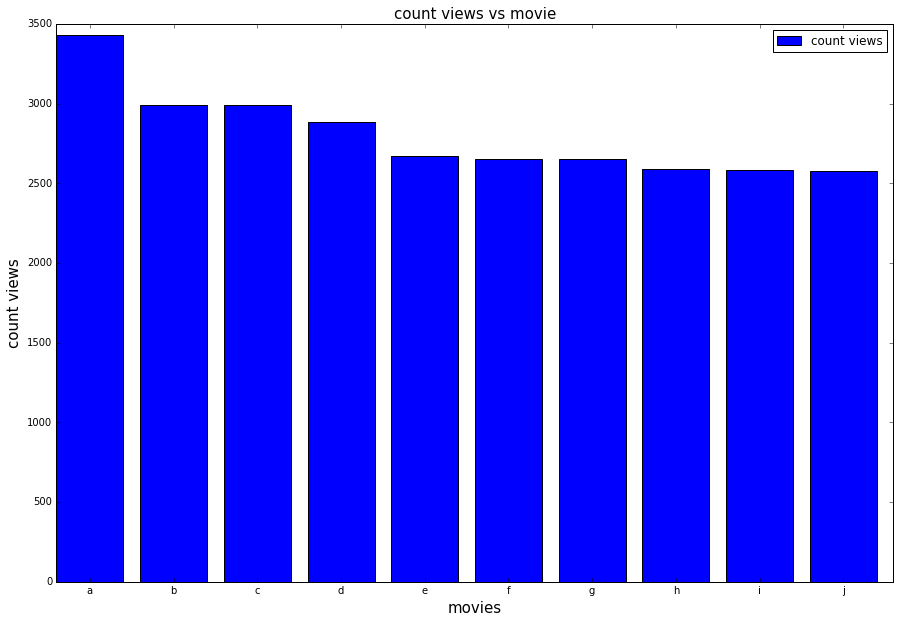

In [20]:
plt.figure(figsize=(15,10)) 
n = ['a','b','c','d','e','f','g','h','i','j'] # as above declared movies are assigned to particular alphabet.
x = n
y = g['count_views']
num = np.arange(len(n))
plt.bar(num,y,label = 'count views')
plt.xticks(num+0.4,x)
plt.xlabel('movies',fontsize ='15')
plt.ylabel('count views',fontsize ='15')
plt.title('count views vs movie',fontsize ='15')
plt.legend()
plt.show()

In [21]:
mr = movies.merge(ratings, on='MovieID', how='inner') # merging movies and ratings files by taking MovieId as key value 
mr.tail()

,MovieID,Title,Genres,UserID,Rating,Timestamp
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537
1000208,3952,"Contender, The (2000)",Drama|Thriller,5998,4,1001781044


In [22]:
ag = mr.merge(users, on='UserID', how='inner')# here we are merging abover merged file to users file by taking userID as key value
ag.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [23]:
age = ag['Title'].str.contains('American Beauty') #checking wether American Beauty movie is there in file  
ag_c = ag[age]
ag_c.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
103,2858,American Beauty (1999),Comedy|Drama,6,1,978236809,F,50,9,55117
236,2858,American Beauty (1999),Comedy|Drama,8,5,978229817,M,25,12,11413
342,2858,American Beauty (1999),Comedy|Drama,9,4,978225333,M,25,17,61614
691,2858,American Beauty (1999),Comedy|Drama,10,3,978224627,F,35,1,95370
1022,2858,American Beauty (1999),Comedy|Drama,18,5,978156168,F,18,3,95825


In [24]:
del ag_c['Title'] # here in upcoming steps deleting some attributes which is not necessary from merged file


In [25]:
del ag_c['Genres']

In [26]:
del ag_c['MovieID']


In [27]:
del ag_c['Rating']
del ag_c['Timestamp']

In [28]:
del ag_c['Gender']
del ag_c['Occupation']
del ag_c['ZipCode']

In [29]:
ag_c.head() #we got the required attributes from merged file

,UserID,Age
103,6,50
236,8,25
342,9,25
691,10,35
1022,18,18


In [30]:
z = ag_c['Age']>56 # this is code to debug and to find count for specified views and we store in y for display
ag_c[z].shape

(0, 2)

### 2) Write a module to plot a chart for the age wise distribution of the count of views for the movie American beauty


Result of sub problem 2.

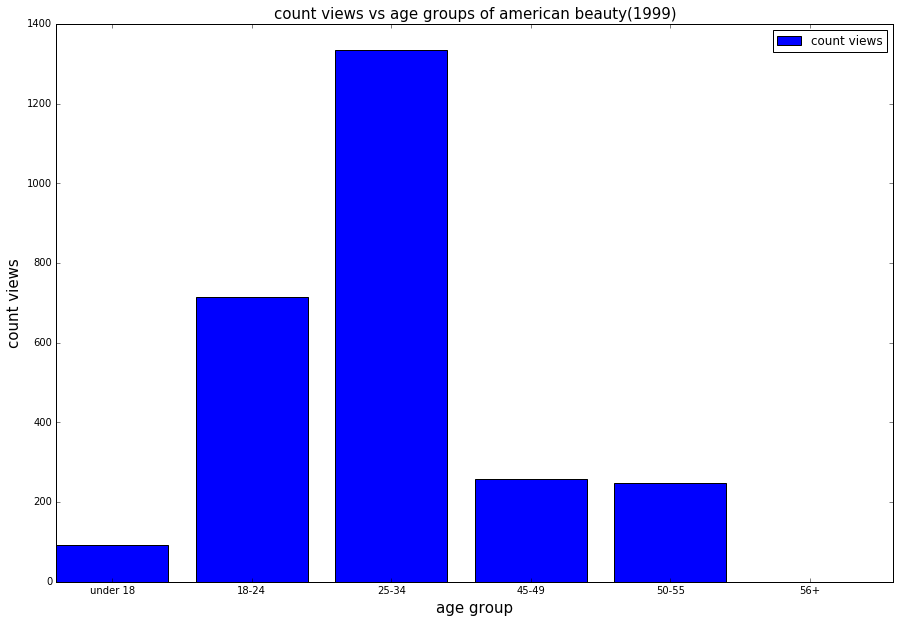

In [31]:
plt.figure(figsize=(15,10))   # ploting bar graph as mentioned in questions and with required values
n = ['under 18','18-24','25-34','45-49','50-55','56+']
x = n
y = [92,715,1334,258,248,0]
num = np.arange(len(n))
plt.bar(num,y,label = 'count views')
plt.xticks(num+0.4,x)
plt.xlabel('age group',fontsize ='15')
plt.ylabel('count views',fontsize ='15')
plt.title('count views vs age groups of american beauty(1999)',fontsize ='15')
plt.legend()
plt.show()

In [32]:
ocu = users.merge(ratings, on='UserID', how='inner') # here the process of merging with users and rating file with key userID
ocu.head()

,UserID,Gender,Age,Occupation,ZipCode,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [33]:
mer_ge = ocu.merge(movies, on="MovieID", how='inner')# the above merged file is merged with movies to find occupation wise top 5 genre 
mer_ge.head()

,UserID,Gender,Age,Occupation,ZipCode,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


### 3) Display how the genres are ranked for each profession. You need to formulate results in following table:


Result of sub problem 3.

In [34]:
rank1 = []    # this code will print the table for particular occupation top 5 genre rank1 rank2....rank5 
rank2 = []
rank3 = []
rank4 = []
rank5 = []
total = []
for i in range(21):    
    val = 0 
    g = 0
    t = 0
    t_count = 0
    ranks = 0
    pro = ["other","academic/educator","artist","clerical/admin","college/grad student","customer service","doctor/health care","executive/managerial","farmer","homemaker","K-12 student","lawyer","programmer","retired","sales/marketing","scientist","self-employed","technician/engineer","tradesman/craftsman","unemployed","writer"]
    val = mer_ge['Occupation'] == i
    g = mer_ge[val]
    ranks= [t for t, t_count in Counter(g['Genres']).most_common(5)] 
    total.append(ranks)
for i in range(len(total)):
    rank1.append(total[i][0])
    rank2.append(total[i][1])
    rank3.append(total[i][2])
    rank4.append(total[i][3])
    rank5.append(total[i][4])
    f= {'Occupation' : pd.Series(pro),'Rank 1' : pd.Series(rank1),'Rank 2' : pd.Series(rank2),'Rank 3' : pd.Series(rank3),'Rank 4' : pd.Series(rank4),'Rank 5' : pd.Series(rank5)}
occupation_ranks= pd.DataFrame(f)
occupation_ranks

,Occupation,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5
0,other,Comedy,Drama,Comedy|Romance,Comedy|Drama,Horror
1,academic/educator,Drama,Comedy,Comedy|Romance,Comedy|Drama,Drama|Romance
2,artist,Drama,Comedy,Comedy|Drama,Comedy|Romance,Drama|Romance
3,clerical/admin,Comedy,Drama,Comedy|Romance,Comedy|Drama,Drama|Romance
4,college/grad student,Comedy,Drama,Comedy|Romance,Comedy|Drama,Action|Thriller
5,customer service,Comedy,Drama,Horror,Comedy|Drama,Comedy|Romance
6,doctor/health care,Drama,Comedy,Comedy|Romance,Comedy|Drama,Drama|Romance
7,executive/managerial,Drama,Comedy,Comedy|Romance,Comedy|Drama,Action|Thriller
8,farmer,Comedy,Drama,Comedy|Romance,Comedy|Drama,Action|Adventure|Sci-Fi
9,homemaker,Comedy,Drama,Comedy|Romance,Comedy|Drama,Drama|Romance


In [35]:
val = 0 # this code will also get top 5 genre for programmers
g = 0
t = 0
t_count = 0
movieid = 0
genres = 0
counts = [ 227,226,220,218,210]
val = mer_ge['Occupation'] == 12
g = mer_ge[val]
movieid= [t for t, t_count in Counter(g['MovieID']).most_common(5)] # this counter function selects the 5 most repeated values 
genres= [t1 for t1, t_count1 in Counter(g['Genres']).most_common(5)]# this too do same thing as bove for genre
pro= {'count' : pd.Series(counts),
     'genres' : pd.Series(genres),'movie_id' : pd.Series(movieid)}
programmer= pd.DataFrame(pro)
print(programmer)

   count           genres  movie_id
0    227           Comedy      1196
1    226            Drama      1210
2    220   Comedy|Romance       589
3    218     Comedy|Drama       260
4    210  Action|Thriller      2858


In [36]:
counts = mer_ge[val][['MovieID','UserID',]].groupby('MovieID').count()# debug function to cross verify 
counts.head()
#counts = [ 227,226,220,218,210]

,UserID
MovieID,
1,140
2,35
3,25
4,9
5,16


### 4) For Programmer occupation show frequency distribution of the top 5 Ranked Genre.

Result of sub problem 4.

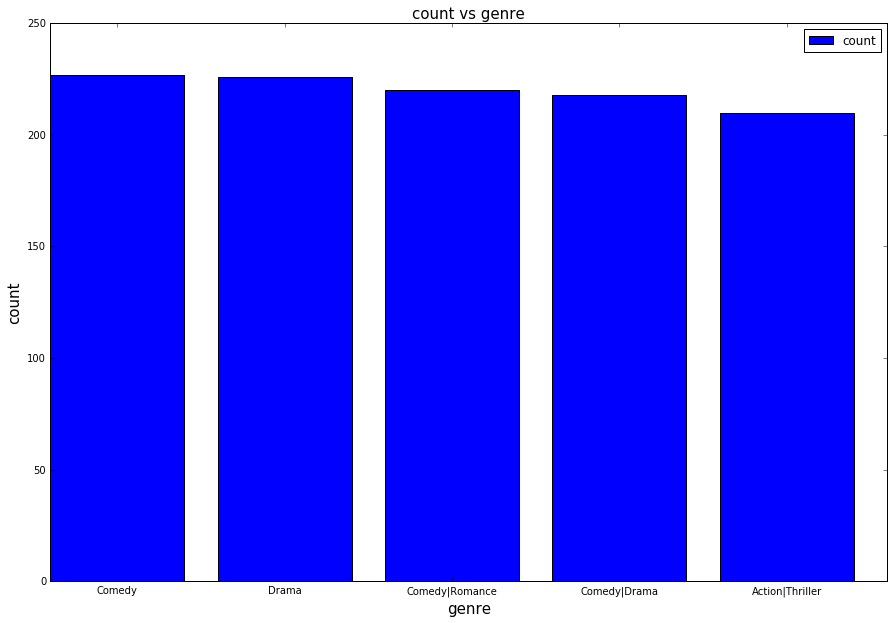

In [37]:
plt.figure(figsize=(15,10)) #visualization of top 5 genre for programmers
x = programmer['genres']
y = programmer['count']
num = np.arange(len(x))
plt.bar(num,y,label = 'count')
plt.xticks(num+0.4,x)
plt.xlabel('genre',fontsize ='15')
plt.ylabel('count',fontsize ='15')
plt.title('count vs genre',fontsize ='15')
plt.legend()
plt.show()

<p style="font-family: Arial; font-size:1.35em;color:red; font-style:bold"><br>

 For this analysis movies data set used from link : http://grouplens.org/datasets/movielens/1m/<br></p>

<p style="font-family: Arial; font-size:1.55em;color:red; font-style:bold"><br>
REFERENCES<br></p>
<p>I worked on this problem on my own.</p>


<p style="font-family: Arial; font-size:1.35em;color:red; font-style:bold"><br>

SOLUTION BY KRISHNA SINDHUR. M<br></p>